In [51]:
__author__ = "Lola-Marie Moron, Sandra Fouzari, Danila Kilin"
__credits__ = ["Lola-Marie Moron", "Sandra Fouzari", "Danila Kilin"]
__version__ = "1.0.1"
__maintainer__ = "Lola-Marie Moron, Sandra Fouzari, Danila Kilin"
__email__ = "lola-marie.moron@edu.devinci.fr"
__status__ = "Development"

In [52]:
!pip install seaborn

In [284]:
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import sklearn
import prince

# Table of Contents
* [Première partie](#chapter1)
    * [Chargement des données](#section_1_1)
    * [Exploration de la donnée](#section_1_2)

# Première partie <a class="anchor" id="chapter1"></a>

## Chargement des données <a class="anchor" id="section_1_1"></a>

In [54]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [55]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [56]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [264]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [57]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Convert categorical variables to category type

In [262]:
catcols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
for col in catcols:
    df[col] = df[col].astype('category')
df.dtypes

Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                        category
dtype: object

different values of categorical columns

In [263]:
for col in catcols:
    print (col, df[col].unique())

Gender ['Female', 'Male']
Categories (2, string): [Female, Male]
family_history_with_overweight ['yes', 'no']
Categories (2, string): [no, yes]
FAVC ['no', 'yes']
Categories (2, string): [no, yes]
CAEC ['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, string): [Always, Frequently, Sometimes, no]
SMOKE ['no', 'yes']
Categories (2, string): [no, yes]
SCC ['no', 'yes']
Categories (2, string): [no, yes]
CALC ['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, string): [Always, Frequently, Sometimes, no]
MTRANS ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
Categories (5, string): [Automobile, Bike, Motorbike, Public_Transportation, Walking]
NObeyesdad ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, string): [Insufficient_Weight, Normal_Weight, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III, Overweight_Level_I, Overweight_Level_II]


In [59]:
df.groupby('CAEC').agg(nb_values=('CAEC','count'))

,nb_values
CAEC,
Always,53
Frequently,242
Sometimes,1765
no,51


In [60]:
df.groupby('MTRANS').agg(nb_values=('MTRANS','count'))

,nb_values
MTRANS,
Automobile,457
Bike,7
Motorbike,11
Public_Transportation,1580
Walking,56


Pourcentage de nan :

In [61]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Gender,Gender,0.0
Age,Age,0.0
Height,Height,0.0
Weight,Weight,0.0
family_history_with_overweight,family_history_with_overweight,0.0
FAVC,FAVC,0.0
FCVC,FCVC,0.0
NCP,NCP,0.0
CAEC,CAEC,0.0
SMOKE,SMOKE,0.0


il n'y a pas de nan

In [137]:
df[['Gender','NObeyesdad','Age']].groupby(['Gender','NObeyesdad']).count().rename({'Age': 'number'}, axis=1).sort_values(by=['Gender','number'])

number
Gender NObeyesdad                 
Female Obesity_Type_II           2
       Overweight_Level_II     103
       Normal_Weight           141
       Overweight_Level_I      145
       Obesity_Type_I          156
       Insufficient_Weight     173
       Obesity_Type_III        323
Male   Obesity_Type_III          1
       Insufficient_Weight      99
       Overweight_Level_I      145
       Normal_Weight           146
       Overweight_Level_II     187
       Obesity_Type_I          195
       Obesity_Type_II         295

**Weight category distribution**

[]

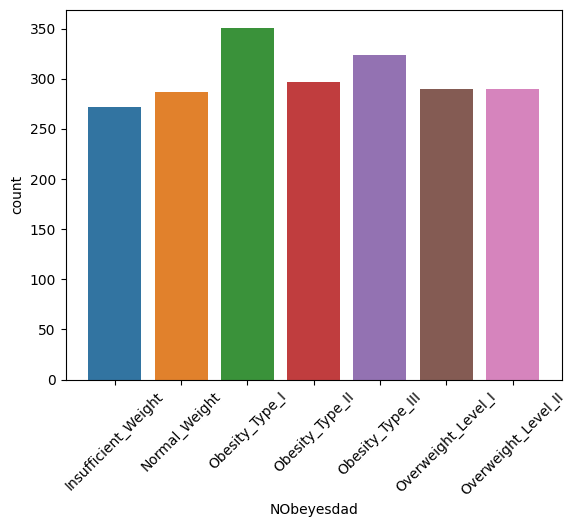

In [228]:
sns.countplot(data=df,x='NObeyesdad')
plt.xticks(rotation=45)
plt.plot()


**Other categorical variables distribution**

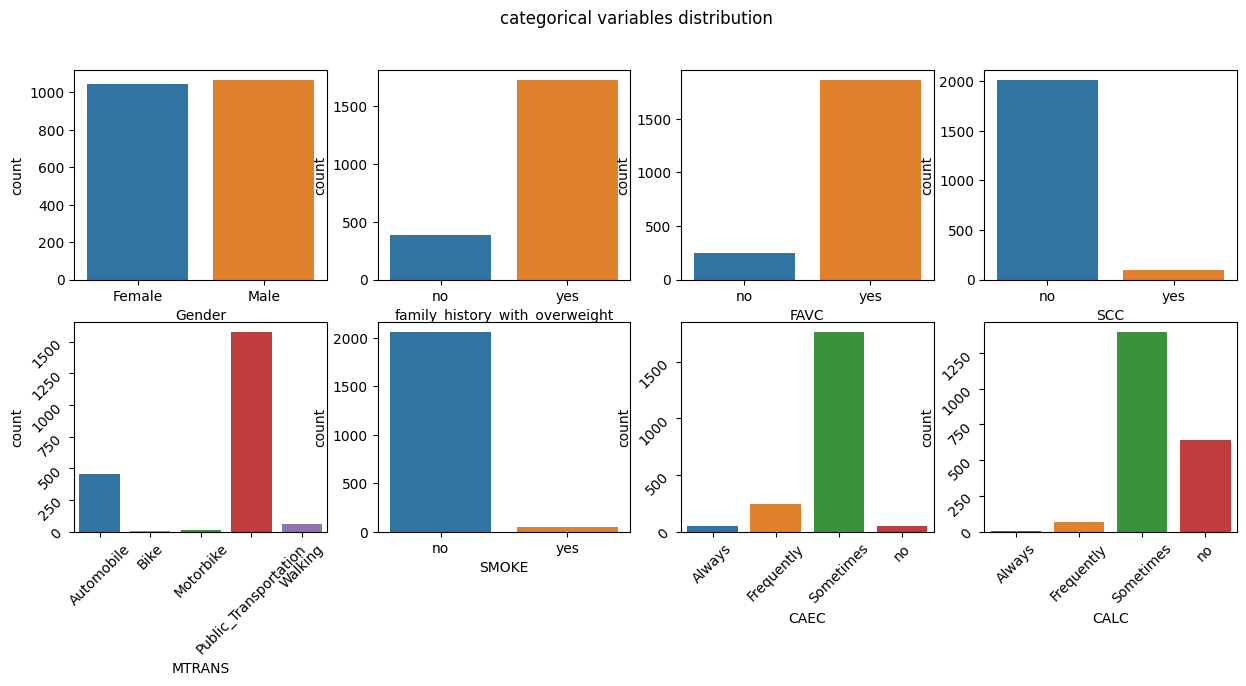

In [260]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
locs, labels = plt.xticks()

fig.suptitle('categorical variables distribution')
sns.countplot(ax=axes[0,0], data=df,x='Gender')
sns.countplot(ax=axes[0,1], data=df,x='family_history_with_overweight')
sns.countplot(ax=axes[0,2], data=df,x='FAVC')
sns.countplot(ax=axes[0,3], data=df,x='SCC')
sns.countplot(ax=axes[1,0], data=df,x='MTRANS')
sns.countplot(ax=axes[1,1], data=df,x='SMOKE')
sns.countplot(ax=axes[1,2], data=df,x='CAEC')
sns.countplot(ax=axes[1,3], data=df,x='CALC')  

axes[1,0].tick_params(labelrotation=45)
axes[1,2].tick_params(labelrotation=45)
axes[1,3].tick_params(labelrotation=45)

plt.show()


**Numerical variables distribution**

[]

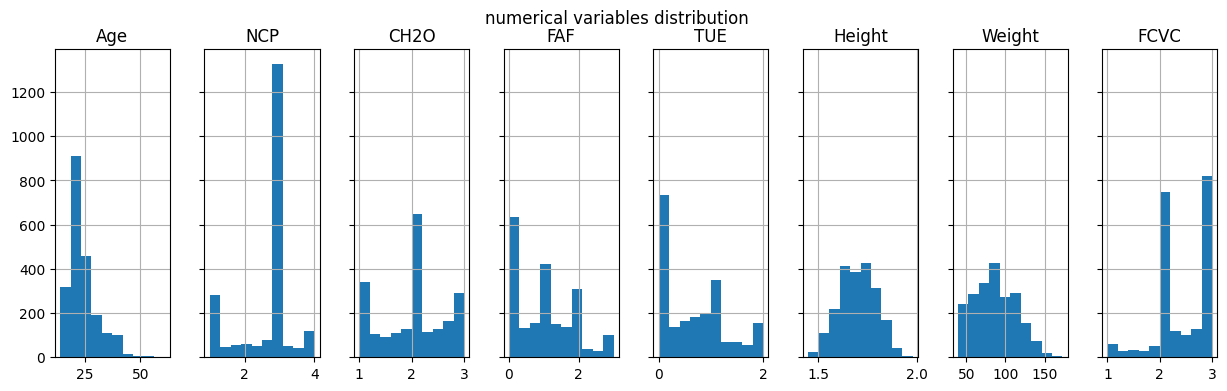

In [261]:
fig, ax = plt.subplots(1,8, sharex='col', sharey='row', figsize=(15, 4))
fig.suptitle('categorical variables distribution')
c=['Age','NCP','CH2O','FAF','TUE','Height','Weight','FCVC']
for i in range(8):
    df.hist(column=c[i], ax=ax[i])
plt.plot()


**Pairplots**

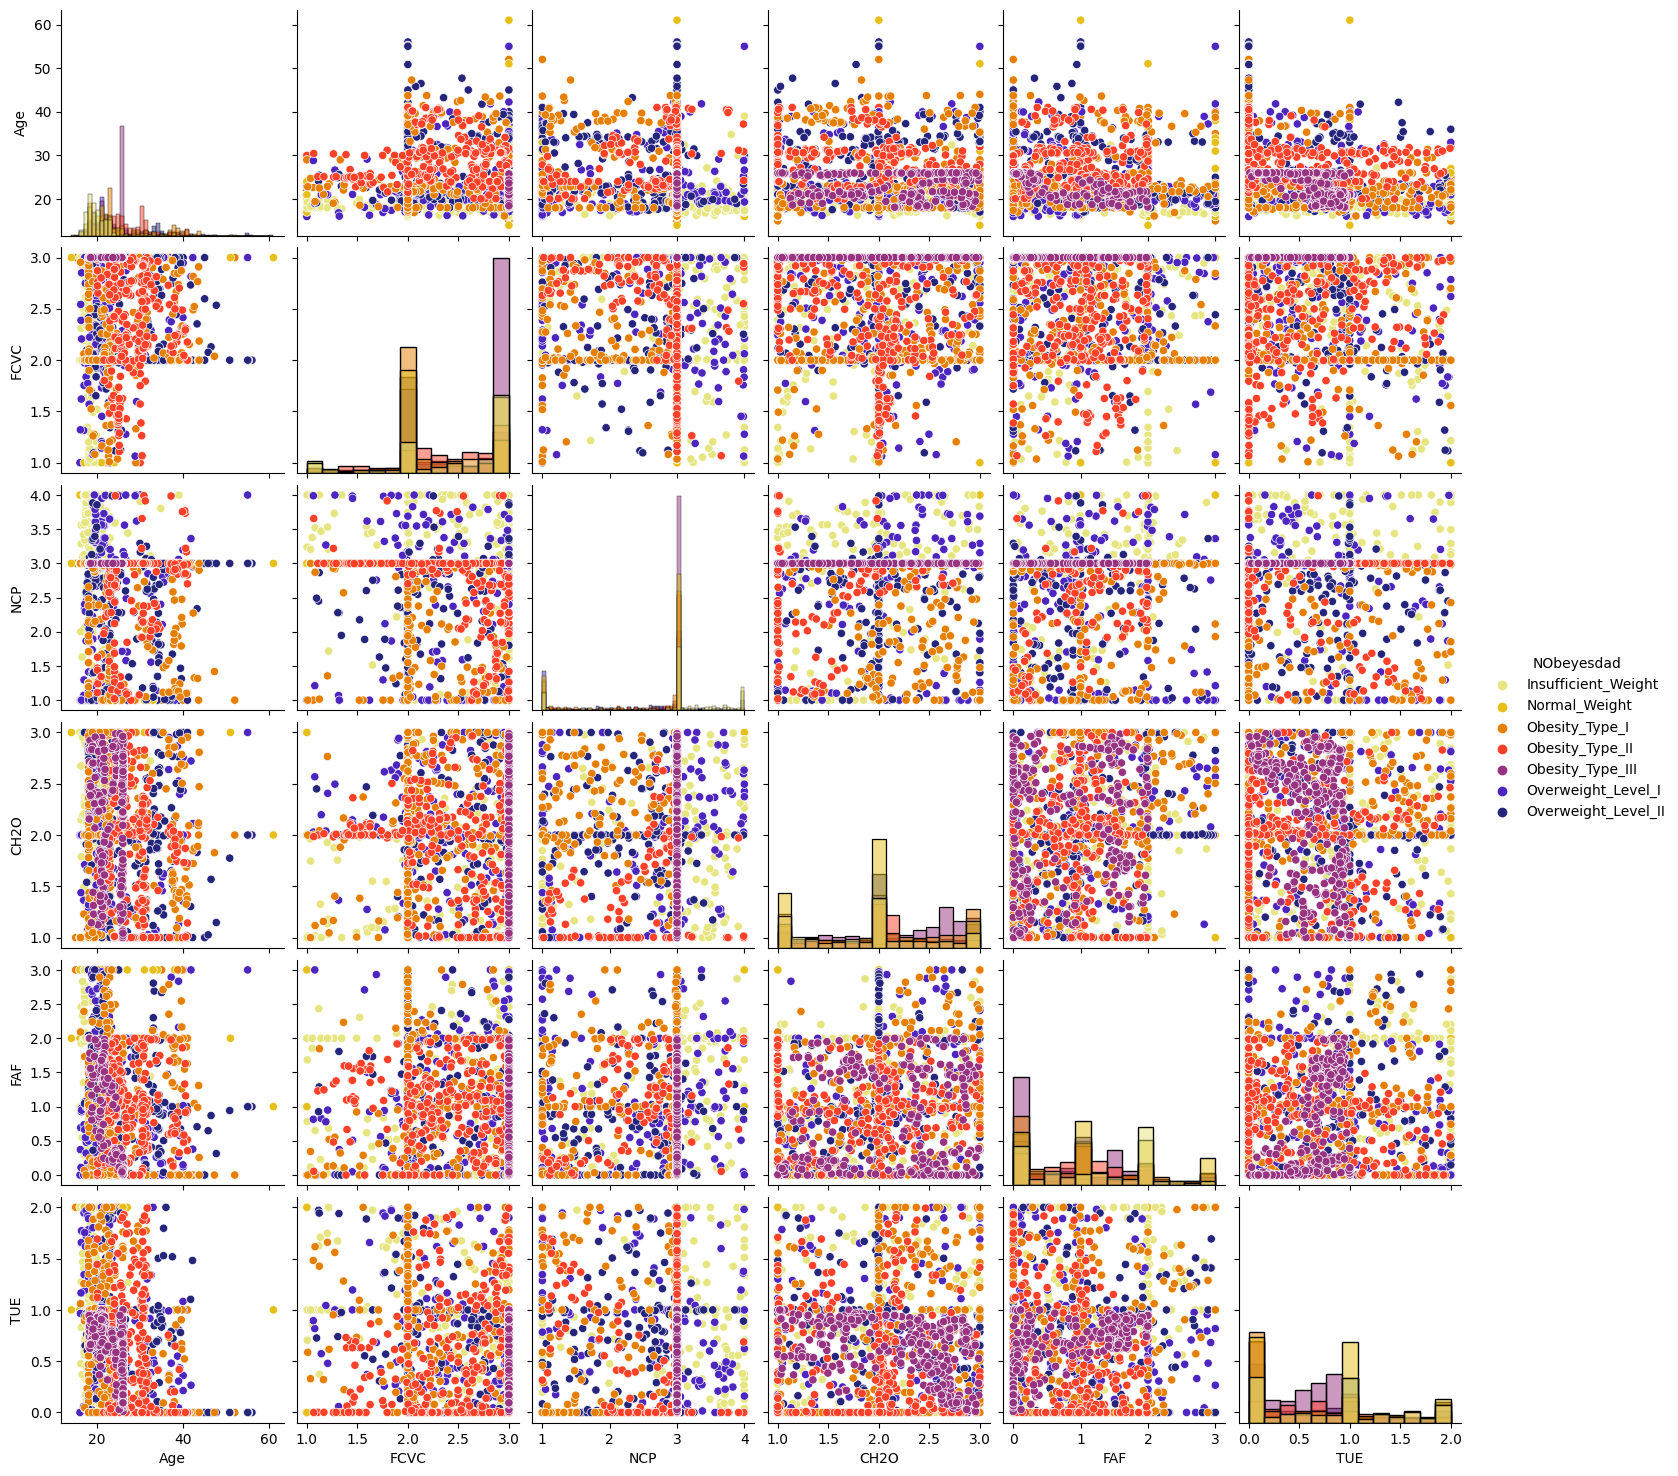

In [283]:
df2=df.copy()
df2.drop(['Weight','Height'], axis=1, inplace=True)
sns.pairplot(df2, diag_kind='hist', hue='NObeyesdad', palette='CMRmap_r')
plt.show()


**MCA on components** (MCA is similar to PCA, but also allows to use categorical components)

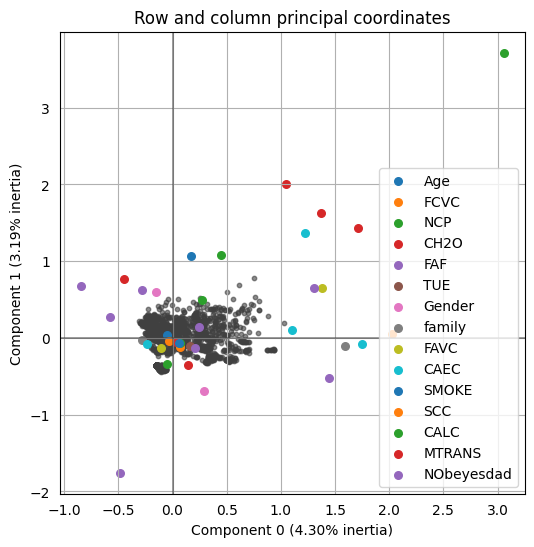

In [295]:
mca = prince.MCA(n_components = 3)
mca = mca.fit(df2)
ax = mca.plot_coordinates(df2)